In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.head()

,timestamp,blockReward
0,1686641615,0.018717
1,1686674447,0.049152
2,1686661571,0.036043
3,1686680411,0.038411
4,1686673727,0.028931


In [7]:
df.shape

(450, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    450 non-null    int64  
 1   blockReward  450 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.2 KB


In [9]:
df.isnull().sum()

timestamp      0
blockReward    0
dtype: int64

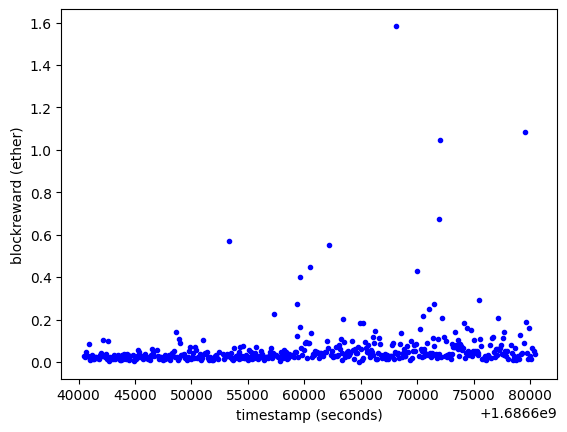

In [12]:
%matplotlib inline
plt.xlabel('timestamp (seconds)')
plt.ylabel('blockreward (ether)')
plt.scatter(df.timestamp,df.blockReward, color="blue",marker=".")

In [14]:
x = df.timestamp.values.reshape(-1,1)
y = df.blockReward.values.ravel()

In [15]:
model_1 = RandomForestRegressor(n_estimators=100,random_state=10)
model_1.fit(x,y)

RandomForestRegressor(random_state=10)

In [33]:
new_timestamp = np.array([[1686645071]])
predicted_blockReward = model_1.predict(new_timestamp)

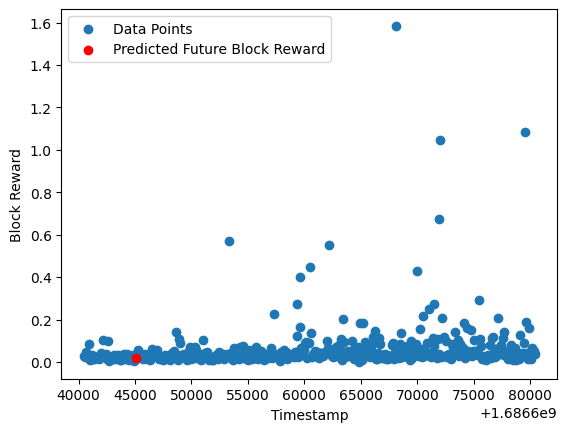

Predicted BlockReward is:  [0.01654571]


In [34]:
plt.scatter(df.timestamp, df.blockReward, label='Data Points')
plt.scatter(new_timestamp, predicted_blockReward, color='red', label='Predicted Future Block Reward')
plt.xlabel('Timestamp')
plt.ylabel('Block Reward')
plt.legend()
plt.show()
print("Predicted BlockReward is: ", predicted_blockReward)

In [22]:
model_2 = XGBRegressor()
model_2.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
new_timestamp_2 = np.array([[1686645071]])
predicted_blockReward_2 = model_2.predict(new_timestamp)

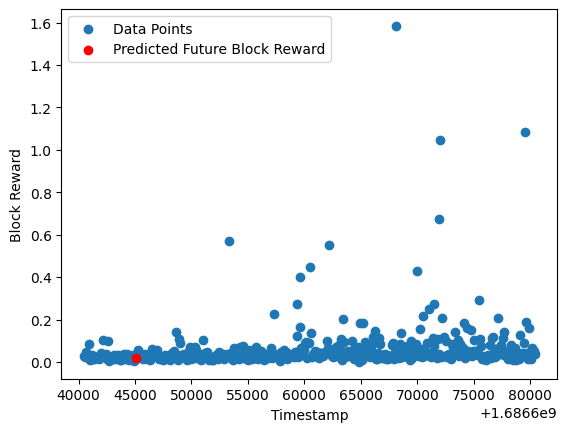

Predicted BlockReward is:  [0.01641651]


In [36]:
plt.scatter(df.timestamp, df.blockReward, label='Data Points')
plt.scatter(new_timestamp, predicted_blockReward_2, color='red', label='Predicted Future Block Reward')
plt.xlabel('Timestamp')
plt.ylabel('Block Reward')
plt.legend()
plt.show()
print("Predicted BlockReward is: ", predicted_blockReward_2)